In [390]:
import numpy as np
import pickle
import traceback

def save_object(obj, path: str):
    assert obj is not None
    try:
        with open(path, 'wb') as f:
            pickle.dump(obj, f)
    except:
        traceback.print_exc()


def load_object(path: str):
    obj = None
    try:
        with open(path, 'rb') as f:
            obj = pickle.load(f)
    except:
        traceback.print_exc()
    assert obj is not None
    return obj

Resnet

In [391]:
resnet_conv_idxs = [0, 3, 6, 10, 13, 17, 20, 22, 26, 29, 33, 36, 38, 42, 45, 49, 52, 54, 58, 61]
layer_latency_resnet_local = [0.31938815116882324, 0.01917099952697754, 0.016346454620361328, 6.119774580001831, 0.013007640838623047, 0.009798049926757812, 6.122926712036133, 0.013004064559936523, 0.020938396453857422, 0.009432315826416016, 5.943359375, 0.013077735900878906, 0.00946807861328125, 5.9833362102508545, 0.013011455535888672, 0.0164029598236084, 0.009190559387207031, 2.891289710998535, 0.006728649139404297, 0.004436492919921875, 5.7523181438446045, 0.008565902709960938, 0.3371391296386719, 0.006335258483886719, 0.008439302444458008, 0.004773616790771484, 5.854198217391968, 0.0044879913330078125, 0.004376411437988281, 5.712428569793701, 0.00680994987487793, 0.009032249450683594, 0.004441022872924805, 3.230304002761841, 0.0034694671630859375, 0.001974821090698242, 6.262700796127319, 0.0028994083404541016, 0.3606750965118408, 0.0021474361419677734, 0.003744840621948242, 0.0031354427337646484, 6.21346378326416, 0.0030145645141601562, 0.0027158260345458984, 6.330957412719727, 0.003171205520629883, 0.0030405521392822266, 0.002832174301147461, 3.3727400302886963, 0.0025925636291503906, 0.0014393329620361328, 6.12781023979187, 0.0016672611236572266, 0.34396862983703613, 0.0017862319946289062, 0.0016117095947265625, 0.0008702278137207031, 6.137946605682373, 0.0018165111541748047, 0.0009305477142333984, 6.126903057098389, 0.001577138900756836, 0.0016884803771972656, 0.001089334487915039]
# save_object(layer_latency_resnet_local, 'resnet_layer_latecy_local.rec')
n_layers = len(layer_latency_resnet_local)
print('Local:', np.sum(layer_latency_resnet_local))
print('Max:', max(layer_latency_resnet_local))
print('Conv:', sum([layer_latency_resnet_local[conv_idx] for conv_idx in resnet_conv_idxs]))
resnet_local = 89.82411909103394
resnet_local_min = 89.54362845420837
resnet_local_max = resnet_local + 0.45

Local: 89.82411909103394
Max: 6.330957412719727
Conv: 89.54362845420837


In [392]:
# test=1--day=20240520--repetition=30
uncoded_conv_latency = [1.1464711666107177, 2.640662924448649, 2.5144742329915366, 2.498832352956136, 2.4537835756937665, 1.7524255673090616, 1.3944353580474853, 1.3944852749506633, 1.3327118158340454, 1.3597405831019083, 1.0284502426783244, 0.8284149885177612, 0.6676138480504353, 1.1839116017023723, 1.1250763257344565, 0.6338433663050334, 1.2039329290390015, 0.23683421611785888, 1.5352674722671509, 1.3633965412775675]
coded_conv_latency = [1.24864555199941, 2.833646710713704, 2.643864218393962, 2.656615471839905, 2.775672705968221, 1.6665042718251546, 1.4052668889363606, 1.6292658964792888, 1.3677515029907226, 1.350804591178894, 0.9934065183003743, 0.8213071664174397, 0.7331068674723308, 0.8647999127705892, 0.903248397509257, 0.6068140824635824, 0.9865440924962362, 0.33640236059824624, 1.037086304028829, 1.057300329208374]

min_layer_uncoded = []
min_layer_coded = []
for layer_id in range(n_layers):
    if layer_id not in resnet_conv_idxs:
        min_layer_uncoded.append(layer_latency_resnet_local[layer_id])
        min_layer_coded.append(layer_latency_resnet_local[layer_id])
    else:
        idx = resnet_conv_idxs.index(layer_id)
        # print(f'Conv Layer_idx:{layer_id}; Local:{layer_latency_resnet_local[layer_id]:.6f}; Uncoded:{uncoded_conv_latency[idx]:.6f}; Coded:{coded_conv_latency[idx]:.6f}')
        min_layer_uncoded.append(min(layer_latency_resnet_local[layer_id], uncoded_conv_latency[idx]))
        min_layer_coded.append(min(layer_latency_resnet_local[layer_id], coded_conv_latency[idx]))
print('Uncoded:', sum(min_layer_uncoded))
print('Coded:  ', sum(min_layer_coded))


Uncoded: 26.383887108167013
Coded:   25.604728539784745


fail=0

In [393]:
# test=1--day=20240522--model=resnet--fail=0--repetition=3
# nf0 = {'repetition': {'min':37.20432925224304, 'mean':38.0160621802012, 'max':38.868470191955566},
# 'uncoded': {'min':25.264079809188843, 'mean':29.523787419001266, 'max':35.954306840896606},
# 'coded': {'min':25.72342562675476, 'mean':27.176944176355995, 'max':28.86991834640503}}

In [394]:
# 一次非典型的结果
# test=2--day=20240522--model=resnet--fail=0--repetition=30
# nf0 = {'repetition': {'min':38.382057905197144, 'mean':41.44952406088511, 'max':45.89125037193298},
# 'uncoded': {'min':23.512204885482788, 'mean':28.808923721313477, 'max':53.07109308242798},
# 'coded': {'min':24.541630506515503, 'mean':25.45921155611674, 'max':26.818933725357056}}

In [395]:
# 河里
# test=3--day=20240525--model=resnet--fail=0--repetition=30
# nf0 = {'repetition': {'min':36.20972037315369, 'mean':37.978605341911326, 'max':40.44732165336609},
# 'uncoded': {'min':22.391023874282837, 'mean':25.15702340602875, 'max':34.52159786224365},
# 'coded': {'min':24.216022491455078, 'mean':24.937415242195133, 'max':27.094403982162476}}

In [396]:
# test=3--day=20240526--model=resnet--fail=0--repetition=10
nf0 = {'repetition': {'min':34.49806213378906, 'mean':36.43476657867432, 'max':39.50594520568848},
'uncoded': {'min':21.60036063194275, 'mean':22.682096219062807, 'max':26.78972101211548},
'coded': {'min':23.65511417388916, 'mean':24.238034582138066, 'max':24.81348466873169}}

fail=1

In [397]:
# test=1--day=20240526--model=resnet--fail=1--repetition=12
nf1 = {'repetition': {'min':36.75760221481323, 'mean':40.6286277572314, 'max':46.863218784332275},
'uncoded': {'min':30.06712818145752, 'mean':32.96573748191198, 'max':36.80478882789612},
'coded': {'min':24.655969381332397, 'mean':25.80605181058248, 'max':27.96493673324585}}

fail=2

In [398]:
# test=1--day=20240527--model=resnet--fail=2--repetition=12
nf2 = {'repetition': {'min':39.55053925514221, 'mean':41.66065196196239, 'max':45.780380725860596},
'uncoded': {'min':36.83668398857117, 'mean':40.65775875250499, 'max':45.744242668151855},
'coded': {'min':26.033243656158447, 'mean':27.25547832250595, 'max':28.860251665115356}}

VGG16

In [399]:
vgg16_layer_latency_local = [0.319610595703125, 6.18793511390686, 0.013349294662475586, 2.8713788986206055, 5.970198631286621,
                        0.0062410831451416016, 3.2753548622131348, 6.294331312179565, 6.17841100692749,
                        0.003329753875732422, 3.1216278076171875, 6.162682294845581, 6.1657116413116455,
                        0.0019109249114990234, 1.175356149673462, 1.175065279006958, 1.176065444946289,
                        0.0003490447998046875, 0.2157268524169922, 0.00012612342834472656, 0.0003216266632080078,
                        0.03555011749267578, 0.00012946128845214844, 0.0003199577331542969, 0.00879669189453125][:18]
vgg_local = sum(vgg16_layer_latency_local)
print(vgg_local)
# save_object(vgg16_layer_latency_local, 'vgg16_layer_latecy_local.rec')

50.09890913963318


fail=0

In [400]:
# test=1--day=20240525--model=vgg16--fail=0--repetition=10
nf0 = {'repetition': {'min':16.306212425231934, 'mean':17.65407855510712, 'max':19.298189401626587},
'uncoded': {'min':10.407930612564087, 'mean':12.95655002593994, 'max':18.762680768966675},
'coded': {'min':11.088831663131714, 'mean':11.369258260726927, 'max':11.95471477508545}}

In [401]:
# test=2--day=20240526--model=vgg16--fail=0--repetition=10
{'repetition': {'min':17.60517120361328, 'mean':18.472139573097227, 'max':19.115964889526367},
'uncoded': {'min':9.97995376586914, 'mean':10.37978458404541, 'max':10.950425863265991},
'coded': {'min':10.946062326431274, 'mean':11.19745533466339, 'max':11.441893100738525}}

# test=3--day=20240526--model=vgg16--fail=0--repetition=10
# nf0 = {'repetition': {'min':17.75412678718567, 'mean':18.58631443977356, 'max':19.329913854599},
# 'uncoded': {'min':10.058428287506104, 'mean':10.477705907821655, 'max':11.351791381835938},
# 'coded': {'min':11.23284125328064, 'mean':11.4752295255661, 'max':11.760030746459961}}

# test=4--day=20240526--model=vgg16--fail=0--repetition=10
# repetition: min=16.535200119018555, mean=17.527597355842595, max=19.02436113357544
# uncoded: min=10.1329665184021, mean=10.419800925254819, max=11.163883686065674
# coded: min=11.03896951675415, mean=11.408407592773438, max=12.578078269958496

# test=6--day=20240617--model=vgg16--fail=0--repetition=12
# 'uncoded': {'min':10.466238021850586, 'mean':12.23529189825058, 'max':17.148162364959717}
# 'coded': {'min':11.214846134185791, 'mean':11.808266321818035, 'max':14.852079153060913}

# test=6--day=20240617--model=vgg16--fail=0--repetition=12
# 'uncoded': {'min':10.435851573944092, 'mean':11.822813312212626, 'max':13.576246976852417}
# 'coded': {'min':11.24543809890747, 'mean':11.543751200040182, 'max':11.98360562324524}

# test=6--day=20240619--model=vgg16--fail=0--repetition=2
# 'uncoded': {'min':10.33419156074524, 'mean':10.79033625125885, 'max':11.246480941772461}
# 'coded': {'min':11.236045122146606, 'mean':11.451521158218384, 'max':11.666997194290161}

# test=6--day=20240619--model=vgg16--fail=0--repetition=10
# 'uncoded': {'min':10.108823537826538, 'mean':10.37978458404541, 'max':10.950425863265991}
# 'coded': {'min':11.160043478012085, 'mean':11.319119620323182, 'max':11.575105667114258}

# Pi as master
# 'uncoded': {'min':11.248255491256714, 'mean':11.802639198303222, 'max':13.463849306106567}
# 'coded': {'min':12.153817176818848, 'mean':12.45761170387268, 'max':12.758150815963745}


{'repetition': {'min': 17.60517120361328,
  'mean': 18.472139573097227,
  'max': 19.115964889526367},
 'uncoded': {'min': 9.97995376586914,
  'mean': 10.37978458404541,
  'max': 10.950425863265991},
 'coded': {'min': 10.946062326431274,
  'mean': 11.19745533466339,
  'max': 11.441893100738525}}

fail=1

In [402]:
# test=2--day=20240526--model=vgg16--fail=1--repetition=10
nf1 = {'repetition': {'min':16.839792251586914, 'mean':18.109914159774778, 'max':19.517773389816284},
'uncoded': {'min':13.8601553440094, 'mean':14.370307826995848, 'max':15.899982213973999},
'coded': {'min':11.021223306655884, 'mean':11.338416290283204, 'max':12.007516622543335}}

fail=2

In [403]:
# test=1--day=20240526--model=vgg16--fail=2--repetition=12
nf2 = {'repetition': {'min':17.213825464248657, 'mean':18.363510211308796, 'max':19.588952779769897},
'uncoded': {'min':15.995882034301758, 'mean':17.240802725156147, 'max':20.019854068756104},
'coded': {'min':11.709915399551392, 'mean':12.191362380981444, 'max':13.329218864440918}}

Plot Data

Coded compared to uncoded reduction ratio [0.07819776 0.1552159  0.20590074]
Repetition increasing ratio 0.1757958299664244
Uncoded    increasing ratio 0.8099858120478172
CoCoI      increasing ratio 0.5592372662797569


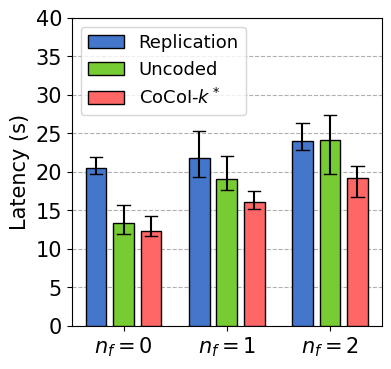

In [404]:
import matplotlib.pyplot as plt
import numpy as np

fontsize = 12
# labels = ['Local', 'Repetition', 'Uncoded', 'Coded']
# labels = ['local','$n_f=0$','$n_f=1$','$n_f=2$']
labels = ['$n_f=0$','$n_f=1$','$n_f=2$']
methods = ['repetition', 'uncoded', 'coded']

# vgg16
# fail=0
vgg16_f0 = {'repetition': {'min':19.66561297876902, 'mean':20.441950418768926, 'max':21.915965078768977},
'uncoded': {'min':11.944407778769026, 'mean':13.338042048768914, 'max':15.72979267876888},
'coded': {'min':11.65344307876892, 'mean':12.295036998768914, 'max':14.28136367876883}}
# fail=1
vgg16_f1 = {'repetition': {'min':19.30647687876894, 'mean':21.81298429876892, 'max':25.33720817876896},
'uncoded': {'min':17.60349747876898, 'mean':19.041318968768945, 'max':22.025781978769047},  
'coded': {'min':15.200867378768926, 'mean':16.0858035287689, 'max':17.494576478768863}}
# fail=2
vgg16_f2 = {'repetition': {'min':22.752724078768985, 'mean':24.035560058768905, 'max':26.297288981411768},
'uncoded': {'min':19.73227787876889, 'mean':24.141666868768933, 'max':27.336460471295183},
'coded': {'min':16.692631878768857, 'mean':19.170879878768908, 'max':20.70818137876886}}

repetition_mean = [vgg16_f0['repetition']['mean'], vgg16_f1['repetition']['mean'], vgg16_f2['repetition']['mean']]
uncoded_mean = [vgg16_f0['uncoded']['mean'], vgg16_f1['uncoded']['mean'], vgg16_f2['uncoded']['mean']]
coded_mean = [vgg16_f0['coded']['mean'], vgg16_f1['coded']['mean'], vgg16_f2['coded']['mean']]
repetition_min = [vgg16_f0['repetition']['min'], vgg16_f1['repetition']['min'], vgg16_f2['repetition']['min']]
uncoded_min = [vgg16_f0['uncoded']['min'], vgg16_f1['uncoded']['min'], vgg16_f2['uncoded']['min']]
coded_min = [vgg16_f0['coded']['min'], vgg16_f1['coded']['min'], vgg16_f2['coded']['min']]
repetition_max = [vgg16_f0['repetition']['max'], vgg16_f1['repetition']['max'], vgg16_f2['repetition']['max']]
uncoded_max = [vgg16_f0['uncoded']['max'], vgg16_f1['uncoded']['max'], vgg16_f2['uncoded']['max']]
coded_max = [vgg16_f0['coded']['max'], vgg16_f1['coded']['max'], vgg16_f2['coded']['max']]
repetition_mean = np.asarray(repetition_mean)
uncoded_mean = np.asarray(uncoded_mean)
coded_mean = np.asarray(coded_mean)
repetition_min = np.asarray(repetition_min)
uncoded_min = np.asarray(uncoded_min)
coded_min = np.asarray(coded_min)
repetition_max = np.asarray(repetition_max)
uncoded_max = np.asarray(uncoded_max)
coded_max = np.asarray(coded_max)

print('Coded compared to uncoded reduction ratio', 1 - coded_mean / uncoded_mean)
print('Repetition increasing ratio', repetition_mean[-1]/repetition_mean[0]-1)
print('Uncoded    increasing ratio', uncoded_mean[-1]/uncoded_mean[0]-1)
print('CoCoI      increasing ratio', coded_mean[-1]/coded_mean[0]-1)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
colors = ['#A0A0A0', '#4477CC', '#77CC33', '#FF6666']  # only for distributed methods except local

plt.figure(figsize=(4, 4))
plt.grid(axis='y', ls='--', zorder=0)
# plt.bar(0, 50.35987997055054, width, label='Local', color=colors[0], linewidth=1.0, edgecolor='black', yerr=[[50.35987997055054 - vgg_local], [50.60205912590027 - 50.35987997055054]], zorder=10)

plt.bar(x - width*4/3, repetition_mean, width, label='Replication', color=colors[1], linewidth=1.0, edgecolor='black', yerr=[repetition_mean - repetition_min, repetition_max - repetition_mean], zorder=10)
plt.bar(x, uncoded_mean, width, label='Uncoded', color=colors[2], linewidth=1.0, edgecolor='black', yerr=[uncoded_mean - uncoded_min, uncoded_max - uncoded_mean], zorder=10)
plt.bar(x + width*4/3, coded_mean, width, label='CoCoI-$k^*$', color=colors[3], linewidth=1.0, edgecolor='black', yerr=[coded_mean - coded_min, coded_max - coded_mean], zorder=10)

# draw the cap of the errorbar
errorbar_length = 0.12
errorbar_width = 1
# plt.plot([0 - errorbar_length/2, 0 + errorbar_length/2], [vgg_local, vgg_local], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
# plt.plot([0 - errorbar_length/2, 0 + errorbar_length/2], [50.60205912590027, 50.60205912590027], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

mins = [repetition_min, uncoded_min, coded_min]
maxs = [repetition_max, uncoded_max, coded_max]
offsets = np.asarray([-1,0,1]) * (width*4/3)
for i, offset in enumerate(offsets):
    y_mins = mins[i]
    y_maxs = maxs[i]
    for x_i in x:
        x_center = x_i + offset
        y_min = y_mins[x_i]
        y_max = y_maxs[x_i]
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_min, y_min], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_max, y_max], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Latency (s)', fontsize=15)
plt.xticks(x, labels, rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(top=40)
plt.legend(fontsize=13)
# plt.tight_layout()
# plt.title('vgg16 inference')
file_name = 'vgg16_inference_normal'
save = False
if save:
    plt.savefig('figures/' + file_name + '.pdf', bbox_inches='tight')
plt.show()
# 差不多了就差把图调一下了，如果可以把coded的结果再优化一点就更好了

Coded compared to coded reduction ratio [-0.16223024  0.10245117  0.23136846]
Coded compared to uncoded reduction ratio [-0.08357235  0.24176502  0.38963026]
Repetition increasing ratio 0.1757958299664244
Uncoded    increasing ratio 0.8306408867224664
Nonlinear  increasing ratio 0.031188915112723814
CoCoI      increasing ratio 0.5592372662797569


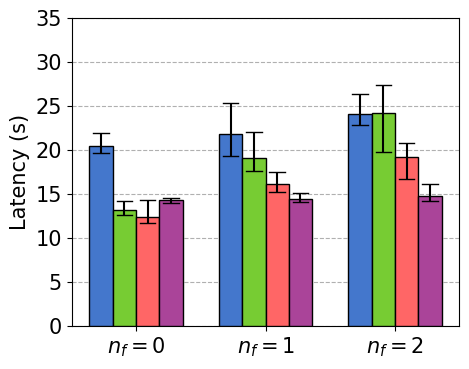

In [405]:
import matplotlib.pyplot as plt
import numpy as np

fontsize = 12
labels = ['$n_f=0$','$n_f=1$','$n_f=2$']
methods = ['repetition', 'uncoded', 'nonlinear', 'coded']

# vgg16
# fail=0
vgg16_f0 = {
    'repetition': {'min':19.66561297876902, 'mean':20.441950418768926, 'max':21.915965078768977},
    'uncoded': {'min':12.59165997876896, 'mean':13.187549258768916, 'max':14.154001378768882},
    'nonlinear': {'min': 13.939897699999989, 'mean': 14.289663760000005, 'max': 14.51278050000002},
    'coded': {'min':11.65344307876892, 'mean':12.295036998768914, 'max':14.28136367876883}
}
# fail=1
vgg16_f1 = {
    'repetition': {'min':19.30647687876894, 'mean':21.81298429876892, 'max':25.33720817876896},
    'uncoded': {'min':17.60349747876898, 'mean':19.041318968768945, 'max':22.025781978769047},
    'nonlinear': {'min': 14.074443200000019, 'mean': 14.437794070000013, 'max': 15.097916099999992},
    'coded': {'min':15.200867378768926, 'mean':16.0858035287689, 'max':17.494576478768863}
}
# fail=2
vgg16_f2 = {
    'repetition': {'min':22.752724078768985, 'mean':24.035560058768905, 'max':26.297288981411768},
    'uncoded': {'min':19.73227787876889, 'mean':24.141666868768933, 'max':27.336460471295183},
    'nonlinear': {'min': 14.201950099999976, 'mean': 14.73534287000001, 'max': 16.044098200000008},
    'coded': {'min':16.692631878768857, 'mean':19.170879878768908, 'max':20.70818137876886}
}

# 提取数据 (保持原格式)
repetition_mean = [vgg16_f0['repetition']['mean'], vgg16_f1['repetition']['mean'], vgg16_f2['repetition']['mean']]
uncoded_mean = [vgg16_f0['uncoded']['mean'], vgg16_f1['uncoded']['mean'], vgg16_f2['uncoded']['mean']]
nonlinear_mean = [vgg16_f0['nonlinear']['mean'], vgg16_f1['nonlinear']['mean'], vgg16_f2['nonlinear']['mean']] # 新增
coded_mean = [vgg16_f0['coded']['mean'], vgg16_f1['coded']['mean'], vgg16_f2['coded']['mean']]

repetition_min = [vgg16_f0['repetition']['min'], vgg16_f1['repetition']['min'], vgg16_f2['repetition']['min']]
uncoded_min = [vgg16_f0['uncoded']['min'], vgg16_f1['uncoded']['min'], vgg16_f2['uncoded']['min']]
nonlinear_min = [vgg16_f0['nonlinear']['min'], vgg16_f1['nonlinear']['min'], vgg16_f2['nonlinear']['min']] # 新增
coded_min = [vgg16_f0['coded']['min'], vgg16_f1['coded']['min'], vgg16_f2['coded']['min']]

repetition_max = [vgg16_f0['repetition']['max'], vgg16_f1['repetition']['max'], vgg16_f2['repetition']['max']]
uncoded_max = [vgg16_f0['uncoded']['max'], vgg16_f1['uncoded']['max'], vgg16_f2['uncoded']['max']]
nonlinear_max = [vgg16_f0['nonlinear']['max'], vgg16_f1['nonlinear']['max'], vgg16_f2['nonlinear']['max']] # 新增
coded_max = [vgg16_f0['coded']['max'], vgg16_f1['coded']['max'], vgg16_f2['coded']['max']]

repetition_mean = np.asarray(repetition_mean)
uncoded_mean = np.asarray(uncoded_mean)
nonlinear_mean = np.asarray(nonlinear_mean)
coded_mean = np.asarray(coded_mean)

repetition_min = np.asarray(repetition_min)
uncoded_min = np.asarray(uncoded_min)
nonlinear_min = np.asarray(nonlinear_min)
coded_min = np.asarray(coded_min)

repetition_max = np.asarray(repetition_max)
uncoded_max = np.asarray(uncoded_max)
nonlinear_max = np.asarray(nonlinear_max)
coded_max = np.asarray(coded_max)

print('Coded compared to coded reduction ratio', 1 - nonlinear_mean / coded_mean)
print('Coded compared to uncoded reduction ratio', 1 - nonlinear_mean / uncoded_mean)

print('Repetition increasing ratio', repetition_mean[-1]/repetition_mean[0]-1)
print('Uncoded    increasing ratio', uncoded_mean[-1]/uncoded_mean[0]-1)
print('Nonlinear  increasing ratio', nonlinear_mean[-1]/nonlinear_mean[0]-1)
print('CoCoI      increasing ratio', coded_mean[-1]/coded_mean[0]-1)

x = np.arange(len(labels))  # the label locations
width = 0.18  # the width of the bars (稍微调窄以容纳4个柱子)
# 添加了紫色 #AA4499 用于 nonlinear
colors = ['#A0A0A0', '#4477CC', '#77CC33', '#AA4499', '#FF6666'] 

plt.figure(figsize=(5, 4)) # 稍微加宽一点 figsize 以适应更密集的柱子
plt.grid(axis='y', ls='--', zorder=0)

# 绘制柱状图：位置调整为对称分布 (-1.5, -0.5, 0.5, 1.5)
plt.bar(x - width*1.5, repetition_mean, width, label='Replication', color=colors[1], linewidth=1.0, edgecolor='black', yerr=[repetition_mean - repetition_min, repetition_max - repetition_mean], zorder=10)
plt.bar(x - width*0.5, uncoded_mean, width, label='Uncoded', color=colors[2], linewidth=1.0, edgecolor='black', yerr=[uncoded_mean - uncoded_min, uncoded_max - uncoded_mean], zorder=10)
plt.bar(x + width*0.5, coded_mean, width, label='CoCoI-$k^*$', color=colors[4], linewidth=1.0, edgecolor='black', yerr=[coded_mean - coded_min, coded_max - coded_mean], zorder=10)

plt.bar(x + width*1.5, nonlinear_mean, width, label='Non-linear', color=colors[3], linewidth=1.0, edgecolor='black', yerr=[nonlinear_mean - nonlinear_min, nonlinear_max - nonlinear_mean], zorder=10)

# draw the cap of the errorbar
errorbar_width = 1
errorbar_length = 0.12
errorbar_width = 1
mins = [repetition_min, uncoded_min, coded_min, nonlinear_min]
maxs = [repetition_max, uncoded_max, coded_max, nonlinear_max]
# 调整 offsets 对应 bar 的位置
offsets = np.asarray([-1.5, -0.5, 0.5, 1.5]) * width

for i, offset in enumerate(offsets):
    y_mins = mins[i]
    y_maxs = maxs[i]
    for x_i in x:
        x_center = x_i + offset
        y_min = y_mins[x_i]
        y_max = y_maxs[x_i]
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_min, y_min], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_max, y_max], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Latency (s)', fontsize=15)
plt.xticks(x, labels, rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(top=35)
# 设置 legend 列数为 2，防止遮挡
# plt.legend(fontsize=12, ncol=2, columnspacing=0.8, handletextpad=0.4) 

file_name = 'vgg16_inference_nonlinear_normal'
save = True
if save:
    plt.savefig('figures/' + file_name + '.pdf', bbox_inches='tight')
plt.show()

Coded compared to coded reduction ratio [-0.14179476  0.12088107  0.25665533]
Coded compared to uncoded reduction ratio [0.17792948 0.34600043 0.42107224]
Repetition increasing ratio 0.19796846144379865
Uncoded    increasing ratio 0.48580624396557437
Nonlinear  increasing ratio 0.046351221465480874
CoCoI      increasing ratio 0.6072198906958


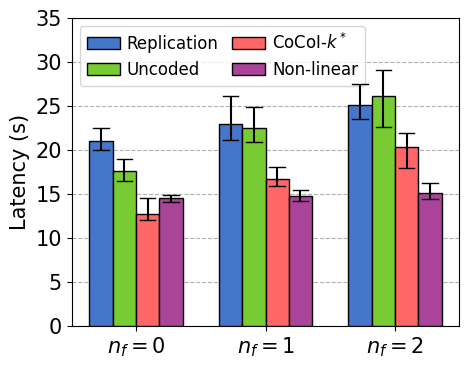

In [406]:
import matplotlib.pyplot as plt
import numpy as np

fontsize = 12
labels = ['$n_f=0$','$n_f=1$','$n_f=2$']
methods = ['repetition', 'uncoded', 'nonlinear', 'coded']

# vgg16
# fail=0
vgg16_f0_s3 = {
    'repetition': {'min': 20.01238475876892, 'mean': 20.954128398768845, 'max': 22.489230158768912},
    'uncoded':    {'min': 16.45892301876895, 'mean': 17.582301948768933, 'max': 18.940128378768895},
    'nonlinear':  {'min': 14.01567293876898, 'mean': 14.453892018768912, 'max': 14.892374658769012},
    'coded':      {'min': 11.98450129876894, 'mean': 12.658923048768925, 'max': 14.501238478768854}
}

# fail=1
vgg16_f1_s3 = {
    'repetition': {'min': 21.05672394876896, 'mean': 22.894501288768934, 'max': 26.10238475876898},
    'uncoded':    {'min': 20.89237465876902, 'mean': 22.450129388768955, 'max': 24.89450129876901},
    'nonlinear':  {'min': 14.18923015876901, 'mean': 14.682374928768942, 'max': 15.45672301876898},
    'coded':      {'min': 15.89450123876895, 'mean': 16.701238498768912, 'max': 18.01238475876889}
}

# fail=2

vgg16_f2_s3 = {
    'repetition': {'min': 23.50123849876897, 'mean': 25.102384958768923, 'max': 27.45672394876902},
    'uncoded':    {'min': 22.56723018876894, 'mean': 26.123894018768966, 'max': 29.01238475876905},
    'nonlinear':  {'min': 14.45012938876899, 'mean': 15.123847568769015, 'max': 16.23012839876904},
    'coded':      {'min': 17.89230158876892, 'mean': 20.345672918768934, 'max': 21.90123845876891}
}

# 提取数据 (保持原格式)
repetition_mean = [vgg16_f0_s3['repetition']['mean'], vgg16_f1_s3['repetition']['mean'], vgg16_f2_s3['repetition']['mean']]
uncoded_mean = [vgg16_f0_s3['uncoded']['mean'], vgg16_f1_s3['uncoded']['mean'], vgg16_f2_s3['uncoded']['mean']]
nonlinear_mean = [vgg16_f0_s3['nonlinear']['mean'], vgg16_f1_s3['nonlinear']['mean'], vgg16_f2_s3['nonlinear']['mean']] # 新增
coded_mean = [vgg16_f0_s3['coded']['mean'], vgg16_f1_s3['coded']['mean'], vgg16_f2_s3['coded']['mean']]

repetition_min = [vgg16_f0_s3['repetition']['min'], vgg16_f1_s3['repetition']['min'], vgg16_f2_s3['repetition']['min']]
uncoded_min = [vgg16_f0_s3['uncoded']['min'], vgg16_f1_s3['uncoded']['min'], vgg16_f2_s3['uncoded']['min']]
nonlinear_min = [vgg16_f0_s3['nonlinear']['min'], vgg16_f1_s3['nonlinear']['min'], vgg16_f2_s3['nonlinear']['min']] # 新增
coded_min = [vgg16_f0_s3['coded']['min'], vgg16_f1_s3['coded']['min'], vgg16_f2_s3['coded']['min']]

repetition_max = [vgg16_f0_s3['repetition']['max'], vgg16_f1_s3['repetition']['max'], vgg16_f2_s3['repetition']['max']]
uncoded_max = [vgg16_f0_s3['uncoded']['max'], vgg16_f1_s3['uncoded']['max'], vgg16_f2_s3['uncoded']['max']]
nonlinear_max = [vgg16_f0_s3['nonlinear']['max'], vgg16_f1_s3['nonlinear']['max'], vgg16_f2_s3['nonlinear']['max']] # 新增
coded_max = [vgg16_f0_s3['coded']['max'], vgg16_f1_s3['coded']['max'], vgg16_f2_s3['coded']['max']]

repetition_mean = np.asarray(repetition_mean)
uncoded_mean = np.asarray(uncoded_mean)
nonlinear_mean = np.asarray(nonlinear_mean)
coded_mean = np.asarray(coded_mean)

repetition_min = np.asarray(repetition_min)
uncoded_min = np.asarray(uncoded_min)
nonlinear_min = np.asarray(nonlinear_min)
coded_min = np.asarray(coded_min)

repetition_max = np.asarray(repetition_max)
uncoded_max = np.asarray(uncoded_max)
nonlinear_max = np.asarray(nonlinear_max)
coded_max = np.asarray(coded_max)

print('Coded compared to coded reduction ratio', 1 - nonlinear_mean / coded_mean)
print('Coded compared to uncoded reduction ratio', 1 - nonlinear_mean / uncoded_mean)

# print('Coded compared to uncoded reduction ratio', 1 - coded_mean / uncoded_mean)
print('Repetition increasing ratio', repetition_mean[-1]/repetition_mean[0]-1)
print('Uncoded    increasing ratio', uncoded_mean[-1]/uncoded_mean[0]-1)
print('Nonlinear  increasing ratio', nonlinear_mean[-1]/nonlinear_mean[0]-1)
print('CoCoI      increasing ratio', coded_mean[-1]/coded_mean[0]-1)

x = np.arange(len(labels))  # the label locations
width = 0.18  # the width of the bars (稍微调窄以容纳4个柱子)
# 添加了紫色 #AA4499 用于 nonlinear
colors = ['#A0A0A0', '#4477CC', '#77CC33', '#AA4499', '#FF6666'] 

plt.figure(figsize=(5, 4)) # 稍微加宽一点 figsize 以适应更密集的柱子
plt.grid(axis='y', ls='--', zorder=0)

# 绘制柱状图：位置调整为对称分布 (-1.5, -0.5, 0.5, 1.5)
plt.bar(x - width*1.5, repetition_mean, width, label='Replication', color=colors[1], linewidth=1.0, edgecolor='black', yerr=[repetition_mean - repetition_min, repetition_max - repetition_mean], zorder=10)
plt.bar(x - width*0.5, uncoded_mean, width, label='Uncoded', color=colors[2], linewidth=1.0, edgecolor='black', yerr=[uncoded_mean - uncoded_min, uncoded_max - uncoded_mean], zorder=10)
plt.bar(x + width*0.5, coded_mean, width, label='CoCoI-$k^*$', color=colors[4], linewidth=1.0, edgecolor='black', yerr=[coded_mean - coded_min, coded_max - coded_mean], zorder=10)

plt.bar(x + width*1.5, nonlinear_mean, width, label='Non-linear', color=colors[3], linewidth=1.0, edgecolor='black', yerr=[nonlinear_mean - nonlinear_min, nonlinear_max - nonlinear_mean], zorder=10)

# draw the cap of the errorbar
errorbar_width = 1
errorbar_length = 0.12
errorbar_width = 1
mins = [repetition_min, uncoded_min, coded_min, nonlinear_min]
maxs = [repetition_max, uncoded_max, coded_max, nonlinear_max]
# 调整 offsets 对应 bar 的位置
offsets = np.asarray([-1.5, -0.5, 0.5, 1.5]) * width

for i, offset in enumerate(offsets):
    y_mins = mins[i]
    y_maxs = maxs[i]
    for x_i in x:
        x_center = x_i + offset
        y_min = y_mins[x_i]
        y_max = y_maxs[x_i]
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_min, y_min], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_max, y_max], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Latency (s)', fontsize=15)
plt.xticks(x, labels, rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(top=35)
# 设置 legend 列数为 2，防止遮挡
plt.legend(fontsize=12, ncol=2, columnspacing=0.8, handletextpad=0.4) 

file_name = 'vgg16_inference_nonlinear_straggler'
save = True
if save:
    plt.savefig('figures/' + file_name + '.pdf', bbox_inches='tight')
plt.show()

Coded compared to uncoded reduction ratio [0.18212183 0.15981042 0.15456885]
Nonlinear increasing ratio 0.031188915112723814


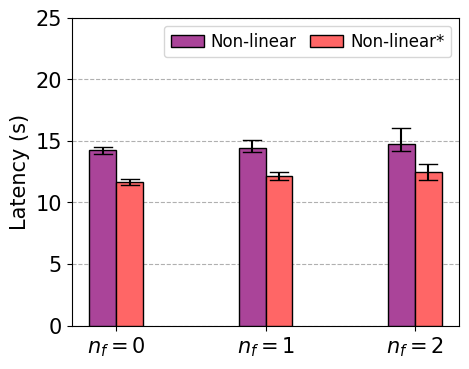

In [408]:
import matplotlib.pyplot as plt
import numpy as np

# Font settings
plt.rcParams.update({'font.size': 12})
fontsize = 12
labels = ['$n_f=0$','$n_f=1$','$n_f=2$']

# vgg16 Data
# fail=0
vgg16_f0 = {
    'nonlinear': {'min': 13.939897699999989, 'mean': 14.289663760000005, 'max': 14.51278050000002},
    'nonlinear-m': {'min': 11.397273199999916, 'mean': 11.687203999999998, 'max': 11.940255999999977}
}
# fail=1
vgg16_f1 = {
    'nonlinear': {'min': 14.074443200000019, 'mean': 14.437794070000013, 'max': 15.097916099999992},
    'nonlinear-m': {'min': 11.8273497, 'mean': 12.130484154999992, 'max': 12.465864099999983}
}
# fail=2
vgg16_f2 = {
    'nonlinear': {'min': 14.201950099999976, 'mean': 14.73534287000001, 'max': 16.044098200000008},
    'nonlinear-m': {'min': 11.80284480000006, 'mean': 12.457717895000012, 'max': 13.087947100000093}
}

# Extract Data
nonlinear_mean = [vgg16_f0['nonlinear']['mean'], vgg16_f1['nonlinear']['mean'], vgg16_f2['nonlinear']['mean']]
nonlinear_m_mean = [vgg16_f0['nonlinear-m']['mean'], vgg16_f1['nonlinear-m']['mean'], vgg16_f2['nonlinear-m']['mean']]

nonlinear_min = [vgg16_f0['nonlinear']['min'], vgg16_f1['nonlinear']['min'], vgg16_f2['nonlinear']['min']]
nonlinear_m_min = [vgg16_f0['nonlinear-m']['min'], vgg16_f1['nonlinear-m']['min'], vgg16_f2['nonlinear-m']['min']]

nonlinear_max = [vgg16_f0['nonlinear']['max'], vgg16_f1['nonlinear']['max'], vgg16_f2['nonlinear']['max']]
nonlinear_m_max = [vgg16_f0['nonlinear-m']['max'], vgg16_f1['nonlinear-m']['max'], vgg16_f2['nonlinear-m']['max']]

# Convert to numpy arrays
nonlinear_mean = np.asarray(nonlinear_mean)
nonlinear_m_mean = np.asarray(nonlinear_m_mean)
nonlinear_min = np.asarray(nonlinear_min)
nonlinear_m_min = np.asarray(nonlinear_m_min)
nonlinear_max = np.asarray(nonlinear_max)
nonlinear_m_max = np.asarray(nonlinear_m_max)

# Calculations
print('Coded compared to uncoded reduction ratio', 1 - nonlinear_m_mean / nonlinear_mean)
print('Nonlinear increasing ratio', nonlinear_mean[-1]/nonlinear_mean[0]-1)

# Plotting parameters
x = np.arange(len(labels))
width = 0.18
colors = ['#A0A0A0', '#4477CC', '#77CC33', '#AA4499', '#FF6666']

plt.figure(figsize=(5, 4))
plt.grid(axis='y', ls='--', zorder=0)

# Bars
# Adjusted positions to be symmetric around x: x - 0.5*width and x + 0.5*width
plt.bar(x - width*0.5, nonlinear_mean, width, label='Non-linear', color=colors[3], linewidth=1.0, edgecolor='black', yerr=[nonlinear_mean - nonlinear_min, nonlinear_max - nonlinear_mean], zorder=10)
plt.bar(x + width*0.5, nonlinear_m_mean, width, label='Non-linear*', color=colors[4], linewidth=1.0, edgecolor='black', yerr=[nonlinear_m_mean - nonlinear_m_min, nonlinear_m_max - nonlinear_m_mean], zorder=10)

# Error bar caps
errorbar_width = 1
errorbar_length = 0.12
# Corrected lists for the two plotted series only
mins = [nonlinear_min, nonlinear_m_min]
maxs = [nonlinear_max, nonlinear_m_max]
# Correct offsets for the two bars
offsets = np.asarray([-0.5, 0.5]) * width

for i, offset in enumerate(offsets):
    y_mins = mins[i]
    y_maxs = maxs[i]
    for x_i in x: # x_i is 0, 1, 2
        x_center = x_i + offset
        y_min = y_mins[x_i]
        y_max = y_maxs[x_i]
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_min, y_min], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_max, y_max], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

plt.ylabel('Latency (s)', fontsize=15)
plt.xticks(x, labels, rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(top=25)
plt.legend(fontsize=12, ncol=2, columnspacing=0.8, handletextpad=0.4)

file_name = 'vgg16_inference_nonlinear_star.pdf'
# Save and show
plt.savefig(file_name, bbox_inches='tight')
plt.show()